<a href="https://colab.research.google.com/github/jessamcs/Week-8-Boosting/blob/main/Boosting_Exercise_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
# Get data
df = pd.read_csv('/content/census_income - census_income.csv')
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income-class    32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [4]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

2047     1
32069    1
5416     1
7465     1
1322     1
        ..
15026    1
12979    1
2740     1
693      1
0        1
Name: Unnamed: 0, Length: 32561, dtype: int64
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-marr

In [5]:
df.isnull()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Fill in the missing data
df['age'].fillna(df['age'].median(), inplace = True)
# Binarize target column


In [7]:
# WHAT IF: regression task
X = df.drop(columns = 'sex')
y = df['sex']

In [8]:
X.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K


In [9]:
# map categorical values into numbers
from sklearn.compose import make_column_selector
# for each categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = X[cat_selector(X)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df[c_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    X[c_name].replace(col_dictionary, inplace=True)

X.head()

workclass
education
marital-status
occupation
relationship
race
native-country
income-class


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,0,0,0,0,0,0,2174,0,40,0,0
1,1,50,1,0,1,1,1,0,0,0,13,0,0
2,2,38,2,1,2,2,0,0,0,0,40,0,0
3,3,53,2,2,1,2,1,1,0,0,40,0,0
4,4,28,2,0,1,3,2,1,0,0,40,1,0


In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      32561 non-null  int64
 1   age             32561 non-null  int64
 2   workclass       32561 non-null  int64
 3   education       32561 non-null  int64
 4   marital-status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   capital-gain    32561 non-null  int64
 9   capital-loss    32561 non-null  int64
 10  hours-per-week  32561 non-null  int64
 11  native-country  32561 non-null  int64
 12  income-class    32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


In [12]:
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [13]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [15]:
print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))

print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.8488943488943489
Testing accuracy: 0.8433853334971134
Training accuracy: 0.8828419328419328
Testing accuracy: 0.8395774474880235
Training accuracy: 0.8483619983619983
Testing accuracy: 0.8424026532367032


In [19]:
# Instantiate scaler 
scaler = StandardScaler() 
# Make an instance of a model 
logreg = LogisticRegression()
# Put scaler and model in a pipeline 
logreg_pipe = make_pipeline(scaler, logreg) 
# Train the model on the data 
logreg_pipe.fit(X_train, y_train); 
# class predictions (not predicted probabilities) 
predictions = logreg_pipe.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)

0.4150595749907874


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
y_test.values
predictions

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [23]:
cm = metrics.confusion_matrix(y_test.values, predictions)
cm

array([[1206, 1467],
       [ 588, 4880]])

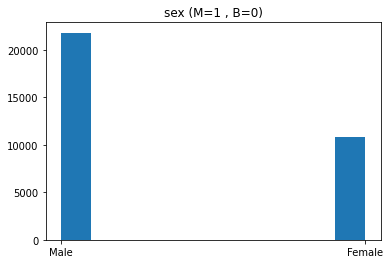

In [24]:
plt.hist(df['sex'])
plt.title('sex (M=1 , B=0)')
plt.show()